# Parameters

There are four options for parameters in `chromatic_fitting`: `Fixed`, `WavelikeFixed`, `Fitted`, and `WavelikeFitted`. `Fixed` is one fixed value for all wavelengths, `WavelikeFixed` are fixed values that are different between wavelengths. `Fitted` determines a prior distribution (e.g. `Uniform`, `Normal`, `TruncatedNormal`) that we will use to fit one value for the parameter across all wavelengths. Similarly, `WavelikeFitted` is a prior distribution that we will use to fit for a different value for every wavelength. 

In [1]:
from chromatic_fitting import *
from pymc3 import Uniform, Normal
import pymc3 as pm
from pymc3 import sample_prior_predictive

Running chromatic_fitting v0.6.0!

This program is running on:
Python v3.9.12 (main, Apr  5 2022, 01:52:34) 
[Clang 12.0.0 ]
numpy v1.21.5
chromatic v0.4.2
pymc3 v3.11.4
pymc3_ext v0.1.1
exoplanet v0.5.3


### `Fixed`

A fixed value for all wavelengths.

In [2]:
a = Fixed(3.0)
print(a)

<🧮 Fixed | 3.0 🧮>


When we call the `.get_prior_vector()` function a `Fixed` parameter will just return its value:

In [50]:
a.get_prior_vector()

3.0

### `WavelikeFixed`

A fixed value for each wavelength:

In [4]:
b = WavelikeFixed([1.0, 2.2, 3.6, 7.7])
print(b)

<🧮 WavelikeFixed | one value for each wavelength (4 elements)🧮>


For the `WavelikeFixed` parameter we can provide the wavelength index we want to the `.get_prior_vector()` function

In [6]:
b.get_prior_vector()

[1.0, 2.2, 3.6, 7.7]

In [5]:
b.get_prior_vector(i=2)

3.6

### `Fitted`

The `Fitted` parameter is for fitting a prior distribution (`self.distribution`) with the given inputs (`self.inputs`) to give us one value for all wavelengths. We can use any distribution we like instead of Normal here, we just need to give it the correct inputs:

In [7]:
c = Fitted(Normal, mu=1.0, sigma=0.1, name="c")
print(c)

<🧮 Fitted Normal(mu=1.0, sigma=0.1, name='c') 🧮>


Let's check we set up the distribution and inputs correctly:

In [8]:
c.distribution, c.inputs

(pymc3.distributions.continuous.Normal, {'mu': 1.0, 'sigma': 0.1, 'name': 'c'})

For the `Fitted` parameters we need to call the `.get_prior_vector()` function for the first time  inside of a PyMC3 model:

In [9]:
with pm.Model() as mod:
    print(c.get_prior_vector())

c ~ Normal


In [10]:
c.get_prior_vector()

c ~ Normal

In [11]:
c._pymc3_prior

c ~ Normal

Now let's check the model (and see if our parameter has been set up in it!):

In [12]:
mod

A final check we can do to understand this parameter is to sample from the prior we've given the model:

In [13]:
with mod:
    # take 5000 samples from the prior distributions:
    sample = sample_prior_predictive(5000)

And if everything has worked then this should look like a Gaussian centred at 1 with ~sigma of 0.1!

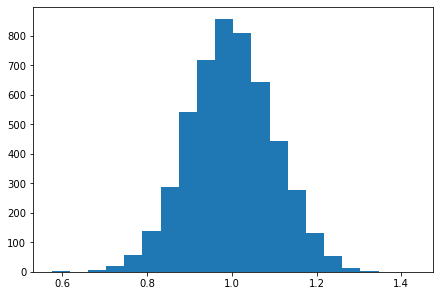

In [14]:
plt.hist(sample['c'], bins=20);

### `WavelikeFitted`

The `WavelikeFitted` parameter is fitting the prior distribution (`self.distribution`) with the given inputs (`self.inputs`) for each wavelength independantly.

In [34]:
d = WavelikeFitted(Uniform, lower=1.0, upper=5.0, name="d")
f = WavelikeFitted(Normal, mu=1.0, sigma=0.1, name="f")
print(d,"\n",f)

<🧮 WavelikeFitted Uniform(lower=1.0, upper=5.0, name='d') for each wavelength 🧮> 
 <🧮 WavelikeFitted Normal(mu=1.0, sigma=0.1, name='f') for each wavelength 🧮>


Let's check our distribution and input values:

In [35]:
d.distribution, d.inputs

(pymc3.distributions.continuous.Uniform,
 {'lower': 1.0, 'upper': 5.0, 'name': 'd'})

In [36]:
f.distribution, f.inputs

(pymc3.distributions.continuous.Normal, {'mu': 1.0, 'sigma': 0.1, 'name': 'f'})

For `WavelikeFitted`, similarly to `Fitted` parameters, we also need to call the `.get_prior_vector()` function for the first time inside a PyMC3 model, however, we need to tell the function which wavelength we want to fit:

In [37]:
kw = {'shape':3}
with pm.Model() as mod:
    d.get_prior_vector(**kw)
    f.get_prior_vector(**kw)

In [45]:
d._pymc3_prior, f._pymc3_prior

(d ~ Uniform, f ~ Normal)

In [46]:
mod

In [47]:
with mod:
    sample = sample_prior_predictive(1000)

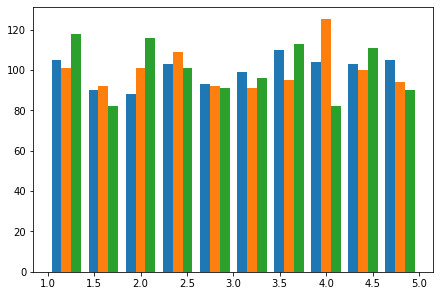

In [48]:
plt.hist(sample['d']);

Looks pretty uniform for each wavelength between 1-5!

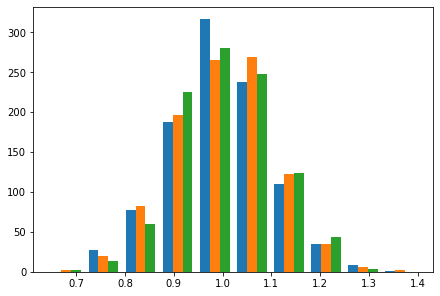

In [49]:
plt.hist(sample['f']);

And looks like a Normal distribution for the `f` parameter too!